In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [3]:
FILE_PATH = 'data/pilot3.json'
#pilot3.json has 10 anagrams -- each subject sees three anagrams randomly -- possible confound of ordering effects
#pilot4.json has 10 anagrams as well -- each subject only sees 1 anagram randomly. 
all_entries = []
with open(FILE_PATH) as file:
    for line in file:
        entry = json.loads(line)
        all_entries.append(entry)
len(all_entries)

144

In [4]:
start = []
finish = []
for entry in all_entries:
    if isinstance(entry['data'], dict):
        condition = entry['data']
        start.append(entry)
    else:
        condition = entry['data'][0]
        finish.append(entry)
print(len(start),len(finish))

def return_indices(user_order): #function that searches through the list of anagrams and returns the indices of the anagrams seen by the subject
    order = ['TEH', 'SROT', 'BLUK', 'PITN', 'SONW', 'VLVOO', 'KHAOMCM', 'IORCNAG', 'HNATUYG', 'DALRBEU']
    idx = []
    for i in range(len(user_order)):
        idx.append(order.index(user_order[i]))
    return idx

72 72


In [5]:
#get subject data for the 10 anagrams

time_guess = [[] for i in range(10)] 
actual_rt = [[] for i in range(10)]
give_up = [[] for i in range(10)]
aha = [[] for i in range(10)]

for entry in finish: 
    entry_data = entry['data']
    idx = return_indices((entry_data[0]['anagrams_seen'])) #get the indices of the anagrams seen by the subject
    anagrams_answers = entry_data[0]['anagrams_answers']
    
    time_guess[idx[0]].append(entry_data[5]['response']) #5 is first time estimation
    
    counter = 6    
    rt = entry_data[6]['rt']
    attempt = entry_data[6]['responses'] 
    g = 0

    while anagrams_answers[0].lower() not in attempt.lower(): #keep incrementing until person gets correct answer or gives up
        if "next" in attempt.lower(): #break if person gave up
            g = 1
            break
        else:                
            counter = counter+1
            attempt = entry_data[counter]['responses']
            rt = rt+entry_data[counter]['rt']  
            
    give_up[idx[0]].append(g) #did subject give up or not
    actual_rt[idx[0]].append(rt) #append actual time to complete

    counter = counter+1    
    r = entry_data[counter]['responses'] #aha rating
    aha[idx[0]].append(int(r[6]))

    #data for second anagram    
    counter = counter+3
    time_guess[idx[1]].append(entry_data[counter]['response']) #time estimation

    counter = counter+1   
    rt = entry_data[counter]['rt']
    attempt = entry_data[counter]['responses']
    g = 0
    while anagrams_answers[1].lower() not in attempt.lower(): #keep incrementing until person gets correct answer or gives up,         
        if "next" in attempt.lower(): #break if person gave up 
            g = 1 #person gave up
            break
        else:
            counter = counter+1
            attempt = entry_data[counter]['responses']
            rt = rt+entry_data[counter]['rt']   
    
    give_up[idx[1]].append(g)
    actual_rt[idx[1]].append(rt) #append actual time to complete

    counter = counter+1
    r = entry_data[counter]['responses'] #aha rating
    aha[idx[1]].append(int(r[6]))

    #data for third anagram    
    counter = counter+3
    time_guess[idx[2]].append(entry_data[counter]['response']) #time estimation
    g = 0
    counter = counter+1   
    rt = entry_data[counter]['rt']
    attempt = entry_data[counter]['responses']    
    
    while anagrams_answers[2].lower() not in attempt.lower(): #keep incrementing until person gets correct answer or gives up        
        if "next" in attempt.lower(): #break if person gave up
            g = 1
            break
        else:            
            rt = rt+entry_data[counter]['rt']
            counter = counter+1
            attempt = entry_data[counter]['responses']    
            
    give_up[idx[2]].append(g) #add if subject gave up or not
    actual_rt[idx[2]].append(rt) #append actual time to complete
    
    counter = counter+1
    r = entry_data[counter]['responses'] #aha rating    
    aha[idx[2]].append(int(r[6]))

In [6]:
#data conversion, clean-up, and storage here

mean_time_guess = []
mean_rt = []
mean_tpe = []
mean_aha = []

for i in range(10): #go through all 10 anagrams here
    give_up_i = give_up[i]
    aha_i = aha[i]    
    time_guess_i = np.asarray(time_guess[i], dtype='float64')*30 
    actual_rt_i = np.asarray(actual_rt[i], dtype='float64')*0.001  
    tpe_i = time_guess_i-actual_rt_i
    
    indexes = [i for i,x in enumerate(give_up_i) if x == 0] #only get subjects who solved the anagram    
    aha_i = np.asarray(aha_i)
    aha_i = aha_i[np.asarray(indexes)] 
    time_guess_i = time_guess_i[np.asarray(indexes)] 
    actual_rt_i = actual_rt_i[np.asarray(indexes)] 
    tpe_i = tpe_i[np.asarray(indexes)]
    
    mean_time_guess.append(np.mean(time_guess_i/60))
    mean_rt.append(np.mean(actual_rt_i/60))
    mean_tpe.append(np.mean(tpe_i/60))
    mean_aha.append(np.mean(aha_i))
    
    print('Time guess:', np.mean(time_guess_i), 'Actual RT:',np.mean(actual_rt_i), 'TPE:', np.mean(tpe_i), 'AHA:',np.mean(aha_i), 'numSubs:', len(aha_i))
    
    


Time guess: 19.0 Actual RT: 3.12155555556 TPE: 15.8784444444 AHA: 2.61111111111 numSubs: 18
Time guess: 19.8947368421 Actual RT: 13.1876315789 TPE: 6.70710526316 AHA: 3.05263157895 numSubs: 19
Time guess: 33.8181818182 Actual RT: 8.91981818182 TPE: 24.8983636364 AHA: 4.13636363636 numSubs: 22
Time guess: 34.7586206897 Actual RT: 15.0767586207 TPE: 19.681862069 AHA: 2.86206896552 numSubs: 29
Time guess: 25.3636363636 Actual RT: 7.29059090909 TPE: 18.0730454545 AHA: 2.31818181818 numSubs: 22
Time guess: 75.75 Actual RT: 14.032 TPE: 61.718 AHA: 3.0625 numSubs: 16
Time guess: 110.5 Actual RT: 43.4446666667 TPE: 67.0553333333 AHA: 3.91666666667 numSubs: 12
Time guess: 70.0909090909 Actual RT: 42.2700909091 TPE: 27.8208181818 AHA: 4.36363636364 numSubs: 11
Time guess: 120.0 Actual RT: 26.6325454545 TPE: 93.3674545455 AHA: 4.54545454545 numSubs: 11
Time guess: 132.3 Actual RT: 42.0038 TPE: 90.2962 AHA: 4.2 numSubs: 10


        aha anagrams        rt       tpe
0  2.611111      TEH  0.052026  0.264641
1  3.052632     SROT  0.219794  0.111785
2  4.136364     BLUK  0.148664  0.414973
3  2.862069     PITN  0.251279  0.328031
4  2.318182     SONW  0.121510  0.301217
5  3.062500    VLVOO  0.233867  1.028633
6  3.916667  KHAOMCM  0.724078  1.117589
7  4.363636  IORCNAG  0.704502  0.463680
8  4.545455  HNATUYG  0.443876  1.556124
9  4.200000  DALRBEU  0.700063  1.504937


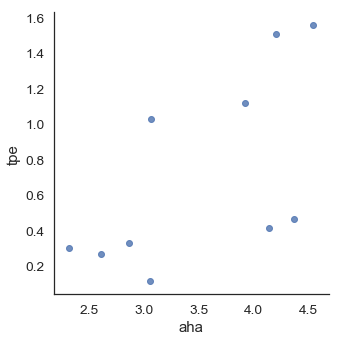

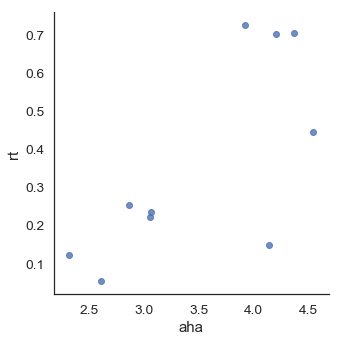

In [7]:
import seaborn as sns
import pandas as pd
sns.set(style="white", font_scale=1.25)

df = pd.DataFrame({'anagrams': ['TEH', 'SROT', 'BLUK', 'PITN', 'SONW', 'VLVOO', 'KHAOMCM', 'IORCNAG', 'HNATUYG', 'DALRBEU'],
    'tpe': mean_tpe,
    'aha': mean_aha,
     'rt':  mean_rt})
print(df)
sns.lmplot('aha', 'tpe', data=df, fit_reg=False)
sns.lmplot('aha', 'rt', data=df, fit_reg=False)

